### INTRODUCTION

## 

### BUSINESS UNDERSTANDING

##

### PROBLEM STATEMENT

##


### OBJECTIVES

##

## DATA UNDERSTANDING

### We are going to be using the data Twitter sentiments  about google and apple products  from CrowdFlower. This is the  [Link] to the data. The csv file contains  the following  variables

- `Tweet_text`: Tweet content
- `semotion_in_tweet_is_directed_at`: The type of device from which the twitter sentimnent was sent
- `emotion`: Emotion of the tweet ,the emotion is classifies as Negative, Positive ,no emotion  or a state where the person could not classify the emotion in the tween , labeled as "I can't tell"



## Importing Libraries

In [287]:
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd 
import nltk  
from nltk.corpus import stopwords
from nltk.tokenize import regexp_tokenize, word_tokenize, RegexpTokenizer  
from nltk.stem import PorterStemmer  
from nltk.probability import FreqDist
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
import os
import re
import sys
import string
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from sklearn.neighbors import KNeighborsClassifier
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, Flatten
import xgboost as xgb
#from wordcloud import WordCloud

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
import seaborn as sns



[nltk_data] Downloading package punkt to C:\Users\Ruth
[nltk_data]     Kioko\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\Ruth
[nltk_data]     Kioko\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\Ruth
[nltk_data]     Kioko\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


## Loading Data

In [288]:
import pandas as pd
data = pd.read_csv('data\judge-1377884607_tweet_product_company.csv',encoding='ISO-8859-1')
data.head()

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion


## Data Cleaning

In [289]:
#Reamane the columns
data.rename(columns={'tweet_text': 'Text', 'emotion_in_tweet_is_directed_at': 'Product', 'is_there_an_emotion_directed_at_a_brand_or_product': 'Sentiment'}, inplace=True)

In [290]:
# Checking if our dataset has missing values
data.isna().sum()
# Dropping the row with missing values

Text            1
Product      5802
Sentiment       0
dtype: int64

In [291]:
#fill in the product column with a placeholder "unknown product"

data['Product'].fillna('Unknown Product',inplace = True)
#check the missing values
data.isna().sum()

Text         1
Product      0
Sentiment    0
dtype: int64

In [292]:
# we can not imout text
data = data.dropna()
#checking if the missing values have been dropped
data.isna().sum()


Text         0
Product      0
Sentiment    0
dtype: int64

In [293]:
# Handling duplicates
# Check if there are any duplicated values, drop them incase they are there and keep the first value

data['Text'].duplicated().sum()

27

In [294]:
#remove duplicates
data = data.drop_duplicates(subset='Text', keep='first')

In [295]:
#check if the duplicates have been dropped
data['Text'].duplicated().sum()


0

In [296]:
# Renaming 'No emotion toward a brand or product' as neutral for easy analysis
data['Sentiment'] = data['Sentiment'].replace({'No emotion toward brand or product': 'Neutral'})

In [297]:
# Checking to see if the row has been renamed
data.Sentiment.value_counts()

Neutral             5372
Positive emotion    2968
Negative emotion     569
I can't tell         156
Name: Sentiment, dtype: int64

In [298]:
#label encode sentiments

label_encoder = {'Negative emotion': 'negative',
                  'Positive emotion': 'positive',
                  'I can\'t tell': 'no_sentiment',
                  'Neutral': 'neutral'}

data['Sentiment'] = data['Sentiment'].map(label_encoder)

# Checking to see if the sentiments have been encoded
data.Sentiment.value_counts()

neutral         5372
positive        2968
negative         569
no_sentiment     156
Name: Sentiment, dtype: int64

<AxesSubplot:xlabel='Sentiment', ylabel='count'>

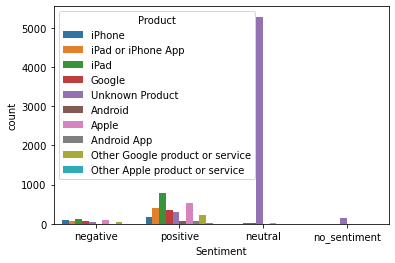

In [299]:
#plot sentiment per product
sns.countplot(x='Sentiment', hue='Product', data=data)

In [300]:
# mapping tweet to the product type
Apple_keywords = ['Apple', 'iPhone', 'iPad', 'MacBook', 'Apple Watch', 'AirPods', 'Apple TV', 'Apple Music', 'iCloud', 'Apple Care', 'iPod', 'Apple Pay', 'ios', 'iPhone app']
Google_kewords = ['google', 'Android', 'Google Play', 'Google', 'Google Home', 'google play music', 'google music', 'google music app', 'Google Music', 'Google Home Music', 'Google Home', 'Google Home Automation']
Keywords=Apple_keywords+Google_kewords

def get_product_classification(Text):
    for keyword in Keywords:
        for keyword in Keywords:
           if re.search(r'\b' + re.escape(keyword) + r'\b', Text, re.IGNORECASE):
              return keyword

data['Product'] = data.apply(lambda row: get_product_classification(row['Text']) if row['Product'] == "Unknown Product" else row['Product'], axis=1)
data['Product'].value_counts()

iPad                               1923
Apple                              1864
google                             1695
iPhone                             1192
iPad or iPhone App                  469
Google                              428
Other Google product or service     293
Android                             276
Android App                          80
Other Apple product or service       35
ios                                  19
Name: Product, dtype: int64

<AxesSubplot:xlabel='Sentiment', ylabel='count'>

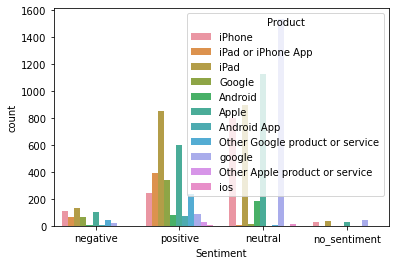

In [301]:
#plot sentiment per product
sns.countplot(x='Sentiment', hue='Product', data=data)

In [302]:
## classify products to google or apple
# Sample list of entries
entries = [
    "Android", "Android", "Android", "Android App", "Android App", "Android App",
    "Apple", "Apple", "Apple", "Gmail", "Google", "Google", "Google AdWords",
    "Google Analytics", "Google Analytics", "Google Chrome", "Google Docs",
    "Google Docs", "Google Maps", "Google Maps", "Google Search",
    "Other Apple product or service", "Other Apple product or service",
    "Other Apple product or service", "Other Google product or service",
    "Other Google product or service", "Other Google product or service",
    "YouTube", "apple", "apple", "apple", "iPad", "iPad", "iPad",
    "iPad or iPhone App", "iPad or iPhone App", "iPad or iPhone App",
    "iPhone", "iPhone", "iPhone", "ios", "ios"
]

# Define the mapping
apple_keywords = ["Apple", "iPhone", "iPad", "AirPods", "MacBook", "ios", "Other Apple product or service"]
google_keywords = ["Google", "Gmail", "Google Drive", "Google Docs", "Google Maps", "YouTube", 
                  "Google Chrome", "Google Search", "Google Analytics", "Google AdWords", 
                  "Android", "Android App", "Other Google product or service"]

# Function to categorize each entry
def categorize(entry):
    entry_lower = entry.lower()
    if any(keyword.lower() in entry_lower for keyword in apple_keywords):
        return "Apple"
    elif any(keyword.lower() in entry_lower for keyword in google_keywords):
        return "Google"
    else:
        return "Other"

# Create key-value pair list
key_value_pairs = {entry: categorize(entry) for entry in entries}

# Print the resulting dictionary
print(key_value_pairs)


{'Android': 'Google', 'Android App': 'Google', 'Apple': 'Apple', 'Gmail': 'Google', 'Google': 'Google', 'Google AdWords': 'Google', 'Google Analytics': 'Google', 'Google Chrome': 'Google', 'Google Docs': 'Google', 'Google Maps': 'Google', 'Google Search': 'Google', 'Other Apple product or service': 'Apple', 'Other Google product or service': 'Google', 'YouTube': 'Google', 'apple': 'Apple', 'iPad': 'Apple', 'iPad or iPhone App': 'Apple', 'iPhone': 'Apple', 'ios': 'Apple'}


In [303]:
brand = {'Android': 'Google', 'Android App': 'Google', 'Apple': 'Apple', 'Gmail': 'Google', 
         'Google': 'Google', 'Google AdWords': 'Google', 'Google Analytics': 'Google', 
         'Google Chrome': 'Google', 'Google Docs': 'Google', 'Google Maps': 'Google', 
         'Google Search': 'Google', 'Other Apple product or service': 'Apple', 
         'Other Google product or service': 'Google', 'YouTube': 'Google', 'apple': 'Apple', 
         'iPad': 'Apple', 'iPad or iPhone App': 'Apple', 'iPhone': 'Apple', 'ios': 'Apple'}

# Applying the mapping
data['brand'] = data['Product'].map(brand)
data['brand'].value_counts()


Apple     5502
Google    1077
Name: brand, dtype: int64

## Exploratory Data Analysis

<AxesSubplot:>

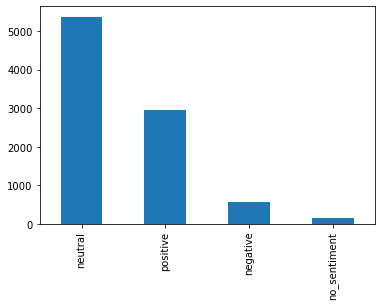

In [304]:
data["Sentiment"].value_counts().plot(kind="bar")

<AxesSubplot:xlabel='brand', ylabel='count'>

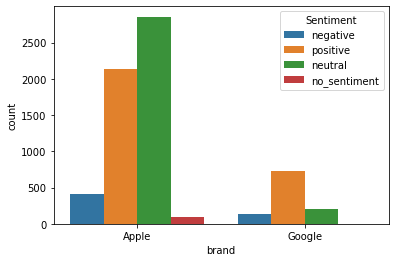

In [305]:
#plot sentiments distributed across brands
sns.countplot(x='brand', hue='Sentiment', data=data)

In [306]:
data.head()

,Text,Product,Sentiment,brand
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,negative,Apple
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,positive,Apple
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,positive,Apple
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,negative,Apple
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,positive,Google


## Data Preprocessing

## Preprocessing steps
1. Tokenize words
2. Clean text by removing punctuations and special symbols
3. Remove stop words
4. Lemmatize words


In [274]:
# Tokenize
data['Text'] = data['Text'].apply(lambda x: nltk.word_tokenize(' '.join(x) if isinstance(x, list) else str(x)))
data.head()



,Text,Product,Sentiment,brand
0,"[., @, wesley83, I, have, a, 3G, iPhone, ., Af...",iPhone,negative,Apple
1,"[@, jessedee, Know, about, @, fludapp, ?, Awes...",iPad or iPhone App,positive,Apple
2,"[@, swonderlin, Can, not, wait, for, #, iPad, ...",iPad,positive,Apple
3,"[@, sxsw, I, hope, this, year, 's, festival, i...",iPad or iPhone App,negative,Apple
4,"[@, sxtxstate, great, stuff, on, Fri, #, SXSW,...",Google,positive,Google


In [307]:
def clean_text(text):
    # Ensure text is a string
    text = str(text)
    
    # Remove URLs
    text = re.sub(r'http\S+', '', text)
    
    # Remove hashtags (including the # symbol)
    text = re.sub(r'#\w+', '', text)
    
    # Remove special characters and punctuation (except spaces)
    text = re.sub(r'[^\w\s]', '', text)
    
    # Remove leading and trailing spaces
    text = text.strip()
    
    # Remove numbers
    text = re.sub(r'\d+', '', text)

    #remove punctuations
    text = re.sub(r'[^\w\s]', '', text)

    
    # Convert text to lowercase
    text = text.lower()
    
    return text

print(data['Text'].apply(clean_text))
data['Text'] = data['Text'].apply(clean_text)
data.head()


0       wesley i have a g iphone after  hrs tweeting a...
1       jessedee know about fludapp  awesome ipadiphon...
2       swonderlin can not wait for   also they should...
3       sxsw i hope this years festival isnt as crashy...
4       sxtxstate great stuff on fri  marissa mayer go...
                              ...                        
9088                                ipad everywhere  link
9089    wave buzz rt mention we interrupt your regular...
9090    googles zeiger a physician never reported pote...
9091    some verizon iphone customers complained their...
9092    ïïàü_êîòáââ_â_ûârt mention google tests ûïchec...
Name: Text, Length: 9065, dtype: object


,Text,Product,Sentiment,brand
0,wesley i have a g iphone after hrs tweeting a...,iPhone,negative,Apple
1,jessedee know about fludapp awesome ipadiphon...,iPad or iPhone App,positive,Apple
2,swonderlin can not wait for also they should...,iPad,positive,Apple
3,sxsw i hope this years festival isnt as crashy...,iPad or iPhone App,negative,Apple
4,sxtxstate great stuff on fri marissa mayer go...,Google,positive,Google


In [314]:
def remove_stopwords(tokens):
    stop_words = set(stopwords.words('english'))
    filtered_tokens = [word for word in tokens if word not in stop_words]
    return filtered_tokens
data['Text'] = data['Text'].apply(remove_stopwords)
data.head()

,Text,Product,Sentiment,brand
0,"[w, e, l, e, , , h, v, e, , , g, , p, h, ...",iPhone,negative,Apple
1,"[j, e, e, e, e, , k, n, w, , b, u, , f, l, ...",iPad or iPhone App,positive,Apple
2,"[w, n, e, r, l, n, , c, n, , n, , w, , f, ...",iPad,positive,Apple
3,"[x, w, , , h, p, e, , h, , e, r, , f, e, ...",iPad or iPhone App,negative,Apple
4,"[x, x, e, , g, r, e, , u, f, f, , n, , f, ...",Google,positive,Google


In [311]:
def lemmatize_text(tokens):
    lemmatizer = WordNetLemmatizer()
    lemmatized_tokens = [lemmatizer.lemmatize(word) for word in tokens]
    return ''.join(lemmatized_tokens)

print(data['Text'].apply(lemmatize_text))

0       wele  hve  g phne fer  hr weeng    w e   nee  ...
1       jeeee knw bu flupp  wee pphne pp h ull lkel pp...
2                   wnerln cn n w fr   l he hul le he wn 
3                  xw  hpe h er fevl n  crh  h er phne pp
4       xxe gre uff n fr  r er ggle  rell ech bkcnfere...
                              ...                        
9088                                     p everwhere  lnk
9089    wve buzz r enn we nerrup ur regulrl cheule  ge...
9090    ggle zeger  phcn never repre penl e e f rele n...
9091    e verzn phne cuer cplne her e fell bck n hur h...
9092    ïïàü_êîòáââ_â_ûâr enn ggle e ûïcheckn fferû   lnk
Name: Text, Length: 9065, dtype: object


In [313]:
#stem the words

def stem_text(tokens):
    stemmer = PorterStemmer()
    stemmed_tokens = [stemmer.stem(word) for word in tokens]
    return ''.join(stemmed_tokens)

print(data['Text'].apply(stem_text))

0       wele  hve  g phne fer  hr weeng    w e   nee  ...
1       jeeee knw bu flupp  wee pphne pp h ull lkel pp...
2                   wnerln cn n w fr   l he hul le he wn 
3                  xw  hpe h er fevl n  crh  h er phne pp
4       xxe gre uff n fr  r er ggle  rell ech bkcnfere...
                              ...                        
9088                                     p everwhere  lnk
9089    wve buzz r enn we nerrup ur regulrl cheule  ge...
9090    ggle zeger  phcn never repre penl e e f rele n...
9091    e verzn phne cuer cplne her e fell bck n hur h...
9092    ïïàü_êîòáââ_â_ûâr enn ggle e ûïcheckn fferû   lnk
Name: Text, Length: 9065, dtype: object


In [279]:
def processed_text(text):
    text = clean_text(text)
    tokens = word_tokenize(text)
    tokens = remove_stopwords(tokens)
    tokens = lemmatize_text(tokens)
    tokens = stem_text(tokens)

    return''.join(tokens)

data['Text'] = data['Text'].apply(processed_text)
print(data['Text'][0])


w e s l e y   g   i p h o n e   h r   t w e e t i n g   r i s e _ a u s t i n   d e a d   n e e d   u p g r a d e   p l u g i n   s t a t i o n   s x s w


In [280]:
print(data.head())

                                                Text             Product  \
0  w e s l e y   g   i p h o n e   h r   t w e e ...              iPhone   
1  j e s s e d e e   k n o w   f l u d a p p   a ...  iPad or iPhone App   
2  s w o n d e r l i n   w a i t   i p a d   a l ...                iPad   
3  s x s w   h o p e   y e a r   f e s t i v a l ...  iPad or iPhone App   
4  s x t x s t a t e   g r e a t   s t u f f   f ...              Google   

  Sentiment   brand  
0  negative   Apple  
1  positive   Apple  
2  positive   Apple  
3  negative   Apple  
4  positive  Google  


In [281]:
#split data into 3 including validation set

from sklearn.model_selection import train_test_split

#train test split


In [282]:
X= data['Text']
y= data['Sentiment']
# Split the data into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize a TfidfVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()

# Fit and transform the training data
X_train_tfidf = vectorizer.fit_transform(X_train)

# Transform the testing data
X_test_tfidf = vectorizer.transform(X_test)

ValueError: empty vocabulary; perhaps the documents only contain stop words

In [126]:
#fitting the model
classifier = MultinomialNB()
classifier.fit(X_train_tfidf, y_train)hy er


MultinomialNB()

In [127]:
#prediction
y_pred = classifier.predict(X_test_tfidf)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

    negative       0.00      0.00      0.00       175
     neutral       0.61      0.99      0.76      1660
no_sentiment       0.00      0.00      0.00        45
    positive       0.39      0.01      0.02       840

    accuracy                           0.61      2720
   macro avg       0.25      0.25      0.19      2720
weighted avg       0.49      0.61      0.47      2720



c:\Users\Ruth Kioko\anaconda3\envs\learn-env\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Ruth Kioko\anaconda3\envs\learn-env\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Ruth Kioko\anaconda3\envs\learn-env\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(resu

In [128]:
#evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy (Naive Bayes):", accuracy)

Accuracy (Naive Bayes): 0.6084558823529411
